# Лабораторная работа №6

### **Уравнения с частными производными параболического типа**

### Вариант 2 - задание 10

**Работу выполнил:** студент группы Б04-856 
<br>
Сунцов Демид Андреевич

**Цель:** нахождение аналитического и численного решения смешанной задачи для квазилинейного уравнения теплопроводности методом прогонки

### **Ход работы**

Рассмотрим смешанную задачу для квазилинейного уравнения теплопроводности с краевыми условиями первого рода в области цилиндрической системы координат $D$

$$ D = \lbrace (t, r, \varphi): 0 \leqslant t, \:  0 \leqslant r \leqslant 1, \: 0 \leqslant \varphi \leqslant \pi/2 \rbrace.$$

$$\frac{\partial u}{\partial t} = \frac{\partial}{r \partial r} \left( r \sqrt{u} \frac{\partial u}{\partial r} \right) + \frac{\partial}{r^2 \partial r} \left( \sqrt{u} \frac{\partial u}{\partial \varphi} \right), \: t > 0, \: r \leqslant 1, \: 0 < \varphi < \pi/2,$$

$$ u(0, r, \varphi) = \frac{r^4 \cos^4 \varphi}{121},$$

$$ u(t, 0, \varphi) = 0,$$

$$ u(t, 1, \varphi) = \frac{\cos^4 \varphi}{(11-10t)^2}.$$

$$ u(t, r, 0) = \frac{r^4}{(11-10t)^2},$$

$$ u(t, r, \pi/2) = 0.$$

Решением задачи будет следующая функция

$$ u(t, r, \varphi) = \frac{r^4 \cos^4 \varphi}{(11 - 10t)^4}.$$

Выберем для численного решения смешанной задачи разностную схему с итерациями по коэффициенту теплопроводности и с расщеплением по пространственным направлениям. Введем в области интегрирования сетку

$$ D_h = \lbrace (r_l, \varphi_m, t^n): r_l = h_r l, \: l = \overline{0, L}, \: L h_r = 1, \\
\varphi_m = h_{\varphi} m, \:  m = \overline{0, M}, \: M h_{\varphi} = \pi/2, \\ t^n = n \tau \:, n = \overline{0, N}, \: N \tau = 1{,}1 - \Delta, \Delta = \text{const} \rbrace$$

Основная идея численного решения заключается в том, что сеточная функция неизвестного решения просчитывается на каждом временном слое $n$. Чтобы рассчитать значения функции на $n+1$-ом временном слое прибегают методу **расщепления по пространственным координатам**. Сначала, на первом полушаге, теплу дают распространиться только в радиальном направлении, как бы "вводя" в азимутальном направлении теплоизолированные границы. Далее, уже на втором полушаге, тепло распространяется только вдоль азимутального направления.

На первом и втором полушаге систему разностных уравнений можно решать, используя **метод прогонки**. 

Выпишем систему разностных уравнений для первого полушага. На начальном этапе выбираем $k = n$.

$$ \frac{\widetilde{u}_{l, m} - u^n_{l, m}}{\tau} = \frac{r_{l + 1/2} \left[ (u^k_{l+1, m})^{1/2} + (u^k_{l, m})^{1/2} \right] (\widetilde{u}_{l+1, m} - \widetilde{u}_{l, m})}{2r_l h_r^2} - \frac{r_{l - 1/2} \left[ (u^k_{l, m})^{1/2} + (u^k_{l-1, m})^{1/2} \right] (\widetilde{u}_{l, m} - \widetilde{u}_{l-1, m})}{2r_l h_r^2}, \\ l = \overline{1, L-1}, \: m = \overline{1, M-1}.$$

$$ \widetilde{u}_{0, m} = 0, \quad \widetilde{u}_{L, m} = \frac{\cos^4 \varphi_m}{(11-10t^{n+1})^2}, \: m = \overline{0, M}.$$

Введем следующие коэффициенты

$$ a_l = - \tau \frac{r_{l+1/2}}{2r_{l}h_r^2} \left[ (u^k_{l+1, m})^{1/2} + (u^k_{l, m})^{1/2} \right],$$

$$ c_l = - \tau \frac{r_{l-1/2}}{2r_{l}h_r^2} \left[ (u^k_{l, m})^{1/2} + (u^k_{l-1, m})^{1/2} \right].$$

Тогда разностную схему можно переписать в более компактной форме

$$ \widetilde{u}_{l, m} - u^n_{l,m} + a_l \widetilde{u}_{l+1, m} - a_l \widetilde{u}_{l, m} - c_l \widetilde{u}_{l, m} + c_l \widetilde{u}_{l-1, m} = 0.$$

Также рассмотрим

$$ b_l = 1 - a_l - c_l, \: d_l = u^n_{l,m}.$$

Получаем ещё более компактную форму

$$ a_l \widetilde{u}_{l+1, m} + b_l \widetilde{u}_{l, m} + c_l \widetilde{u}_{l-1, m} = d_l, \: l = \overline{1, L-1}.$$

Приходим к форме, которая была получена в лабораторной работе 4 при решении краевой задачи методом прогонки. Коэффициенты $a_l$, $b_l$, $c_l$ и $d_l$ есть суть прогоночные коэффициенты.

Учтем еще два уравнения, определяемые граничными условиями при $r = 0$ и $r = 1$.

$$ \widetilde{u}_{0, m} = 0,$$

$$\: \widetilde{u}_{L, m} = d_L.$$

Полученную систему решаем методом прогонки, таким образом находя неизвестные значения $\widetilde{u}_{l, m}$ при всех $m = \overline{1, M-1}$.

Далее начинается второй полушаг нашей задачи. Выпишем для него разностную схему

$$ \frac{u^{k+1}_{l, m} - \widetilde{u}_{l, m}}{\tau} = \frac{\left[ (u^k_{l, m+1})^{1/2} + (u^k_{l, m})^{1/2} \right] (u^{k+1}_{l, m+1} - u^{k+1}_{l, m})}{2r_l h_{\varphi}^2} - \frac{\left[ (u^k_{l, m})^{1/2} + (u^k_{l, m-1})^{1/2} \right] (u^{k+1}_{l, m} - u^{k+1}_{l, m-1})}{2r_l h_{\varphi}^2}, \\ l = \overline{1, L-1}, \: m = \overline{1, M-1}.$$

$$ u^{k+1}_{l, 0} = \frac{r^4_l}{(11-10t^{n+1})^2}, \quad u^{k+1}_{l, M} = 0, \: l = \overline{0, L}.$$

Рассмотрим коэффициенты

$$ a_m = - \frac{\tau}{2r_{l}h_{\varphi}^2} \left[ (u^k_{l, m+1})^{1/2} + (u^k_{l, m})^{1/2} \right],$$

$$ c_m = - \frac{\tau}{2r_{l}h_{\varphi}^2} \left[ (u^k_{l, m})^{1/2} + (u^k_{l, m-1})^{1/2} \right].$$

Разностная схема перепишется следующим образом

$$ u^{k+1}_{l, m} - \widetilde{u}_{l, m} + a_m u^{k+1}_{l, m+1} - a_m u^{k+1}_{l, m} - c_m u^{k+1}_{l, m} + c_m u^{k+1}_{l, m-1} = 0.$$

Также рассмотрим

$$ b_m = 1 - a_m - c_m, \: d_m = \widetilde{u}_{l, m}$$

Получим в итоге

$$ a_m u^{k+1}_{l, m+1} + b_m u^{k}_{l, m} + c_m u^{k+1}_{l, m-1} = d_m, \: m = \overline{1, M-1}.$$

Добавим два уравнения, полученные из граничных условий при $\varphi = 0$ и $\varphi = \pi/2.$

$$ u^{k+1}_{l, 0} = \frac{r^4_l}{(11-10t^{n+1})^2}, $$

$$ u^{k+1}_{l, M} = 0.$$

Решаем полученную систему методом прогонки и находим неизвестные $u^{k+1}_{l, m}$ на новой итерации. Далее, необходимо проверить выполнение следующего неравенства

$$ \max _{l, m} \Big| \frac{u^{k+1}_{l, m} - u^{k}_{l, m}}{u_{l, m}} \Big| < \varepsilon. $$

Если неравенство не выполнено, то прибегают к следующей итерации по индексу $k$ $-$ снова выполняется вычисление $u^{k}_{l,m}$ методом прогонки при увеличенном на единицу $k$. Это продолжается до тех пор, пока не выполнится данное неравенство. Как только неравенство выполняется (предположим, при некотором $k = J$), считают, что временной слой $n+1$ посчитан, причем $u^{n+1}_{l, m} =u^{J}_{l, m}$ для всех $l$ и $m$.

Теперь переходим к непосредственному построению аналитического и численного решений смешанной задачи для уравнения теплопроводности. Подключим необходимые библиотеки.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import brentq

Создадим класс для уравнения теплопровдности <code><font color='blue'>Heat_transfer_equation</font></code> (без начальных и краевых условий), атрибутом которого является число $\mu$ (в нашей задаче $\mu = 1/2$).

In [2]:
class Heat_transfer_equation(object):
    def __init__(self, mu):
        self.mu = mu

Далее создадим класс для смешанной задачи <code><font color='blue'>Mixed_boundary_problem</font></code>, являющийся дочерним для класса <code><font color='blue'>Heat_transfer_equation</font></code>. Класс <code><font color='blue'>Heat_transfer_equation</font></code> имеет два метода: <code><font color='blue'>analitic_solution_mbp</font></code> и <code><font color='blue'>computational_solution_mbp</font></code>. Первый предназначен для построения аналитического решения смешанной задачи, второй $-$ для численного решения. Оба метода возвращают временную, координатную (радиальную и азимутальную) сетки, а также сеточную функцию $u^n_{l,m}$.

In [28]:
class Mixed_boundary_problem(Heat_transfer_equation):
    def __init__(self, mu, C1):
        self.C1 = C1
        Heat_transfer_equation.__init__(self, mu)

    def analitic_solution_mbp(self, N, L, M, delta):
        t = np.linspace(0, self.C1 * self.mu /(2 * (2 + self.mu)) - delta, N+1)
        r = np.linspace(0, 1, L+1)
        phi = np.linspace(0, np.pi/2, M+1)
        tau = (self.C1 * self.mu /(2 * (2 + self.mu)) - delta)/N
        h_r = 1/L
        h_phi = np.pi/(2*M)
        
        u = [0 for n in range(len(t))]
        for n in range(len(t)):
            u[n] = [0 for l in range(len(r))]
            for l in range(len(r)):
                u[n][l] = [0 for m in range(len(phi))]

        for n in range(len(t)):
            for l in range(len(r)):
                for m in range(len(phi)):
                    a = (r[l] * np.cos(phi[m]))**(2/self.mu) * (self.C1 - 2 * (self.mu + 2)/self.mu * t[n])**(-1/self.mu)
                    u[n][l][m] = a

        return [t, r, phi, u]
    
    def computational_solution_mbp(self, N, L, M, delta, eps):
        mu = self.mu
        C1 = self.C1
        # 1-composition of computational grid and definition of grid function
        t = np.linspace(0, C1 * mu /(2 * (2 + mu)) - delta, N+1)
        tau = (C1 * mu /(2 * (2 + mu)) - delta)/N  

        r = []
        h_r = 1/L
        for l in range(2*L+1):
            r.append(h_r/2 * l)

        phi = np.linspace(0, np.pi/2, M+1)   
        h_phi = np.pi/(2*M)

        u = [0 for n in range(N+1)]
        for n in range(N+1):
            u[n] = [0 for l in range(L+1)]
            for l in range(L+1):
                u[n][l] = [0 for m in range(M+1)]

        # 2-initializing initial conditions
        for l in range(L+1):
            for m in range(M+1):
                u[0][l][m] = (r[2*l] * np.cos(phi[m]))**(2/mu)/(C1)**(1/mu)
        
        for n in range(N+1):
            for m in range(M+1):
                u[n][L][m] = (np.cos(phi[m]))**(2/mu)/(C1 - 2*(mu + 2)/mu * t[n])**(1/mu)
                u[n][0][m] = 0

        for n in range(N+1):
            for l in range(L+1):
                u[n][l][M] = 0
                u[n][l][0] = (r[2*l])**(2/mu)/(C1 - 2*(mu + 2)/mu * t[n])**(1/mu)
        
        for n in range(N):
            k = n
            J = k
            while (True):
                u_ = [0 for l in range(L+1)]
                for l in range(L+1):
                    u_[l] = [0 for m in range(M+1)]

                for m in range(M+1):
                    u_[0][m] = 0
                    u_[L][m] = (np.cos(phi[m]))**(2/mu)/(C1 - 2*(mu + 2)/mu * t[n+1])**(1/mu)

                # first sub-step of the task
                for m in range(1, M):
                    #solving the boundary problem by the run-through method
                    s_a = [0 for l in range(L+1)]
                    s_b = [0 for l in range(L+1)]
                    s_c = [0 for l in range(L+1)]
                    s_d = [0 for l in range(L+1)]

                    alpha = [0 for l in range(L)]
                    beta = [0 for l in range(L)]

                    s_a[0] = 0
                    s_b[0] = 1
                    s_c[0] = 0
                    s_d[0] = 0

                    alpha[0] = -s_a[0]/s_b[0]
                    beta[0] = s_d[0]/s_b[0]

                    for l in range(1, L):
                        s_a[l] = -tau * r[2*l+1] /(2 * h_r**2 * r[2*l]) * ((u[k][l+1][m])**mu + (u[k][l][m])**mu)
                        s_c[l] = -tau * r[2*l-1] /(2 * h_r**2 * r[2*l]) * ((u[k][l][m])**mu + (u[k][l-1][m])**mu)
                        s_b[l] = 1 - s_a[l] - s_c[l]
                        s_d[l] = u[n][l][m]

                        alpha[l] = -s_a[l]/(s_b[l] + s_c[l] * alpha[l-1])
                        beta[l] = (s_d[l] - s_c[l] * beta[l-1])/(s_b[l] + s_c[l] * alpha[l-1])

                    s_a[L] = 0
                    s_b[L] = 1
                    s_c[L] = 0
                    s_d[L] = (np.cos(phi[m]))**(2/mu)/(C1 - 2*(mu + 2)/mu * t[n+1])**(1/mu)

                    u_[L][m] = (s_d[L] - s_c[L] * beta[L-1])/(s_b[L] + s_c[L] * alpha[L-1])

                    for l in reversed(range(1, L+1)):
                        u_[l-1][m] = alpha[l-1] * u_[l][m] + beta[l-1]

                # second sub-step of the task
                for l in range(1,L):
                    #solving the boundary problem by the run-through method
                    s_a = [0 for m in range(M+1)]
                    s_b = [0 for m in range(M+1)]
                    s_c = [0 for m in range(M+1)]
                    s_d = [0 for m in range(M+1)]

                    alpha = [0 for m in range(M)]
                    beta = [0 for m in range(M)]

                    s_a[0] = 0
                    s_b[0] = 1
                    s_c[0] = 0
                    s_d[0] = (r[2*l])**(2/mu)/(C1 - 2*(mu + 2)/mu * t[n+1])**(1/mu)

                    alpha[0] = (-s_a[0])/s_b[0]
                    beta[0] = (s_d[0])/s_b[0]

                    for m in range(1, M):
                        s_a[m] = (-tau)/(2 * h_phi**2 * r[2*l]) * ((u[k][l][m+1])**mu + (u[k][l][m])**mu)
                        s_c[m] = (-tau)/(2 * h_phi**2 * r[2*l]) * ((u[k][l][m])**mu + (u[k][l][m-1])**mu)
                        s_b[m] = 1 - s_a[m] - s_c[m]
                        s_d[m] = u_[l][m]

                        alpha[m] = (-s_a[m])/(s_b[m] + s_c[m] * alpha[m-1])
                        beta[m] = (s_d[m] - s_c[m] * beta[m-1])/(s_b[m] + s_c[m] * alpha[m-1])

                    s_a[M] = 0
                    s_b[M] = 1
                    s_c[M] = 0
                    s_d[M] = 0

                    u[k+1][l][M] = (s_d[M] - s_c[M] * beta[M-1])/(s_b[M] + s_c[M] * alpha[M-1])

                    for m in reversed(range(1, M+1)):
                        u[k+1][l][m-1] = alpha[m-1] * u[k+1][l][m] + beta[m-1]

                q = [0 for l in range(L+1)]
                for l in range(L+1):
                    q[l] = [0 for m in range(M+1)]

                for l in range(1, L):
                    for m in range(1, M):
                        q[l][m] = abs((u[k+1][l][m] - u[k][l][m]) / u[k][l][m])

                max_1_q = []
                for l in range(1, L):
                    max_1_q.append(max(q[l]))
                max_2_q = max(max_1_q)

                if (max_2_q >= eps) and ((k + 1) != N):
                    k = k + 1
                    J = k
                else:
                    break

            for l in range(1, L):
                for m in range(1, M): 
                    u[n+1][l][m] = u[J+1][l][m]
                    
        return [t, r, phi, u]

Создадим переменную <code><font color='black'>MBP</font></code> класса <code><font color='blue'>Mixed_boundary_problem</font></code> и решим смешанную задачу численно и аналитически. 

In [89]:
MBP = Mixed_boundary_problem(0.5, 11)
data_1 = MBP.analitic_solution_mbp(150, 100, 100, 0.01)
data_2 = MBP.computational_solution_mbp(150, 100, 100, 0.01, eps=0.0005)

Для визуализации полученных результатов создадим вспомогательную функцию <code><font color='blue'>plot_polar</font></code>, которая строит линии уровней полученной сеточной функции решения в фиксированный момент времени $T$, близкий к 1.

In [90]:
def plot_polar(ax, theta, r, values, levels, ylabel, title, savefig_name):
    ax.set_thetamin(0)
    ax.set_thetamax(90)
    ax.set_rmax(1)
    cs = ax.contourf(theta, r, values, levels)
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel(ylabel, fontsize=18)

    ax.set_rlabel_position(0.0)
    ax.set_title(title, va='bottom', fontsize=20)
    ax.grid(True)

    plt.savefig(savefig_name, dpi=300)

Приступаем к непосредственной визуализации результатов. Строим график для численного решения задачи.

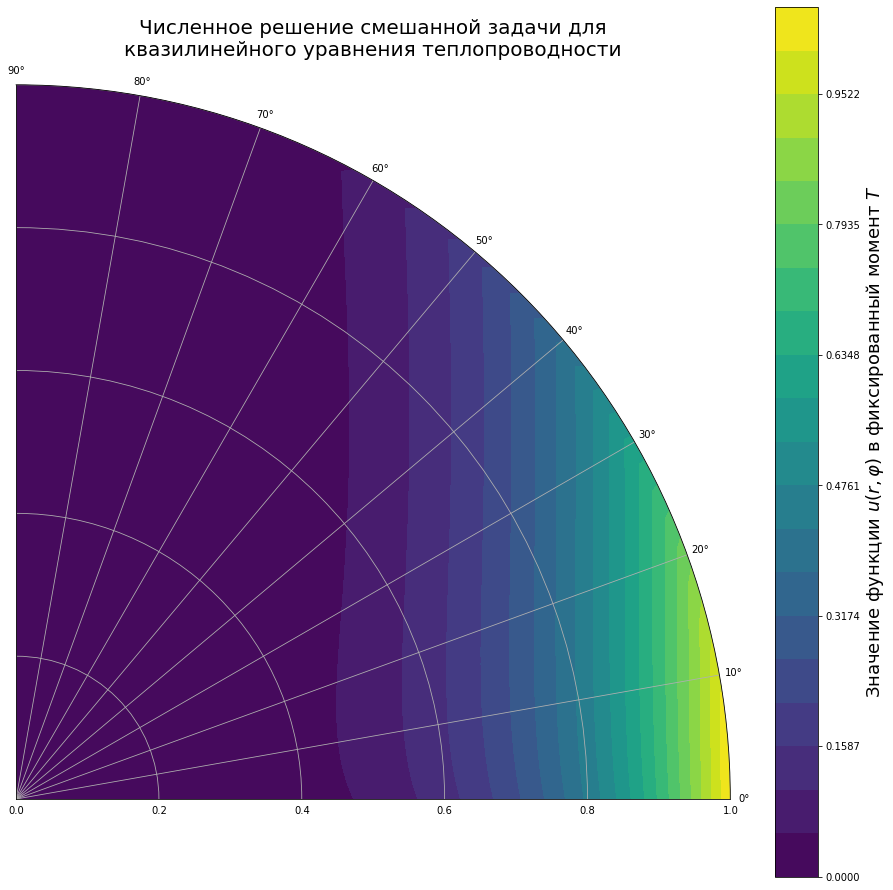

In [91]:
t = data_2[0]
r = data_2[1]
phi = data_2[2]
u = data_2[3]

N = len(t) - 1
L = int(len(r)/2)
M = len(phi) - 1

for n in range(N+1):
    if (t[n] >= 1.0):
        n_fixed = n
        break

values_2 = [0 for m in range(M+1)]
for m in range(len(phi)):
    values_2[m] = [u[n_fixed][l][m] for l in range(L+1)]

azimuths = phi
zeniths = [0 for l in range(L+1)]
for l in range(L+1):
    zeniths[l] = r[2*l]

r_, theta = np.meshgrid(zeniths, azimuths)

max_ = [0 for m in range(M+1)]

for m in range(M+1):
    max_[m] = max(values_2[m])

levels = np.linspace(0, float('{:.3f}'.format(max(max_))), 21)

#-- Plot ------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=dict(projection='polar'))
ylabel = r'Значение функции $u(r, \varphi)$ в фиксированный момент $T$'
title = r'Численное решение смешанной задачи для' + '\n' + 'квазилинейного уравнения теплопроводности'
savefig_name = 'test-1.png'
plot_polar(ax, theta, r_, values_2, levels, ylabel, title, savefig_name)

Строим график для аналитического решения.

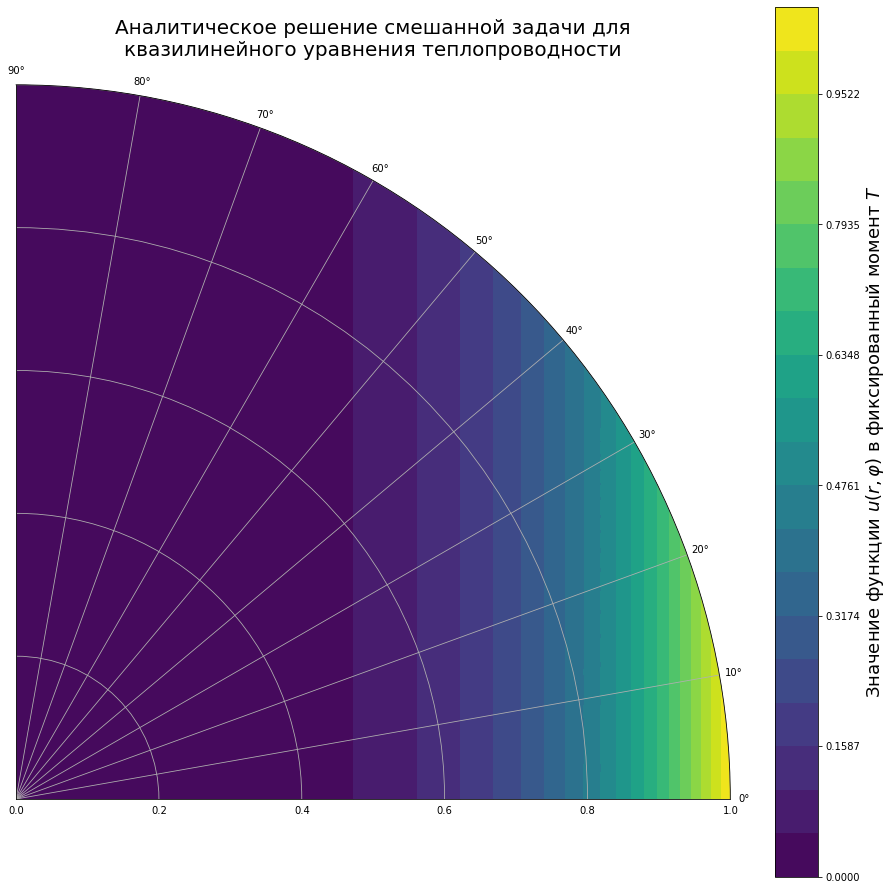

In [92]:
t = data_1[0]
r = data_1[1]
phi = data_1[2]
u = data_1[3]

L = int(len(r)) - 1
M = len(phi) - 1

values_1 = [0 for m in range(M+1)]
for m in range(M+1):
    values_1[m] = [u[n_fixed][l][m] for l in range(L+1)]

zeniths = r
azimuths = phi

r_, theta = np.meshgrid(zeniths, azimuths)

max_ = [0 for m in range(M+1)]

for m in range(M+1):
    max_[m] = max(values_1[m])

levels = np.linspace(0, float('{:.3f}'.format(max(max_))), 21)
#-- Plot ------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=dict(projection='polar'))
ylabel = r'Значение функции $u(r, \varphi)$ в фиксированный момент $T$'
title = r'Аналитическое решение смешанной задачи для' + '\n' + 'квазилинейного уравнения теплопроводности'
savefig_name = 'test-1.png'
plot_polar(ax, theta, r_, values_1, levels, ylabel, title, savefig_name)

Как видно, численное и аналитическое решения смешанной задачи совпадают в пределах требуемой точности. Построим график разности численного и аналитического решений.

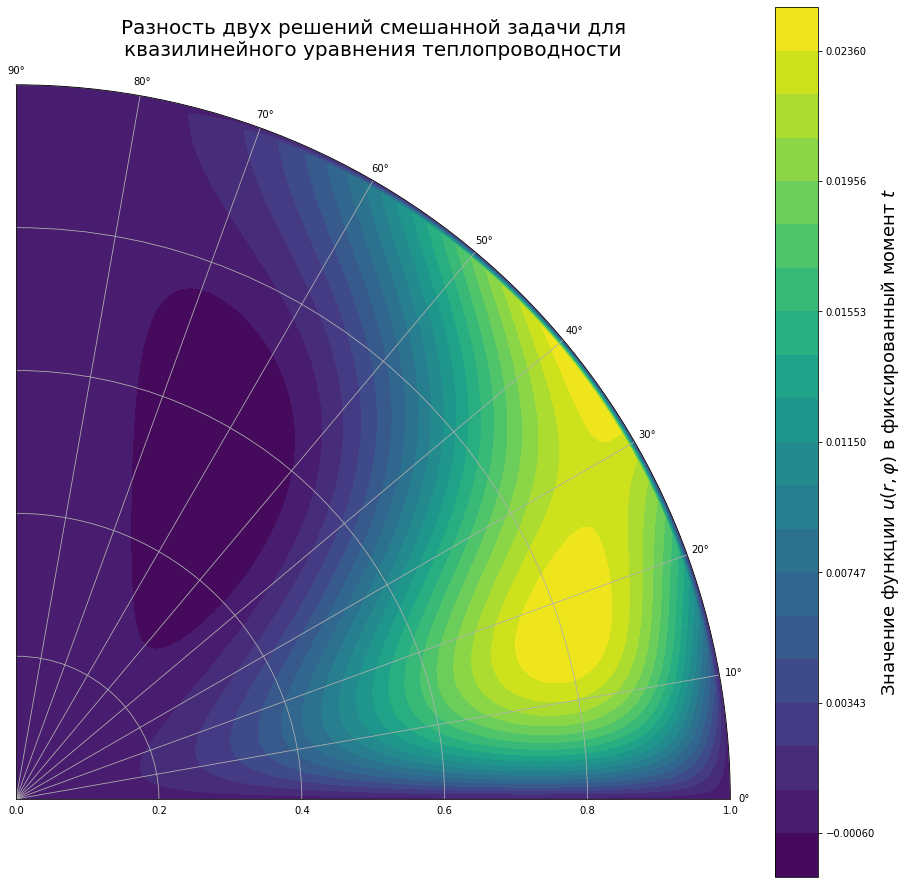

In [93]:
diff = [0 for m in range(M+1)]
for m in range(M+1):
    diff[m] = [u[10][l][m] for l in range(L+1)]
    
for m in range(M+1):
    for l in range(L+1):
        diff[m][l] = values_2[m][l] - values_1[m][l]
        
max_ = [0 for m in range(M+1)]
min_ = [0 for m in range(M+1)]

for m in range(M+1):
    max_[m] = max(diff[m])
    min_[m] = min(diff[m])

levels = np.linspace(float('{:.7f}'.format(min(min_))), float('{:.7f}'.format(max(max_))), 21)

#-- Plot ------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=dict(projection='polar'))
ylabel = r'Значение функции $u(r, \varphi)$ в фиксированный момент $t$'
title = r'Разность двух решений смешанной задачи для' + '\n' + 'квазилинейного уравнения теплопроводности'
savefig_name = 'test-1.png'
plot_polar(ax, theta, r_, diff, levels, ylabel, title, savefig_name)

Модуль разности численного и аналитического решений задачи отклоняется не более чем на $\sigma = 3 \cdot 10^{-2}$. Увеличивая размерность сеток и уменьшая величину погрешности $\varepsilon$, можно добиться уменьшения максимального отклонения разности двух решений смешанной задачи.